In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
bcs=pd.read_csv('bank_customer_survey.csv')
bcs.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [3]:
bcs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null int64
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


In [4]:
bcs.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [5]:
bcs.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
for i in bcs.columns:
    print(i,bcs[i].unique())

age [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
job ['management' 'technician' 'entrepreneur' 'blue' 'unknown' 'retired'
 'admin' 'services' 'self' 'unemployed' 'housemaid' 'student']
marital ['married' 'single' 'divorced']
education ['tertiary' 'secondary' 'unknown' 'primary']
default ['no' 'yes']
balance [ 2143    29     2 ...  8205 14204 16353]
housing ['yes' 'no']
loan ['no' 'yes']
contact ['unknown' 'cellular' 'telephone']
day [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
duration [ 261  151   76 ... 1298 1246 1556]
campaign [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39

In [7]:
bcs.groupby(bcs.y).count()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
y,,,,,,,,,,,,,,,,
0,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922
1,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289


In [8]:
bcs.y.value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [9]:
bcs['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [10]:
bcs['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [11]:
bcs['job'].value_counts()

blue            9732
management      9458
technician      7597
admin           5171
services        4154
retired         2264
self            1579
entrepreneur    1487
unemployed      1303
housemaid       1240
student          938
unknown          288
Name: job, dtype: int64

In [12]:
bcs['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [13]:
bcs['education']=bcs['education'].str.replace('unknown','secondary')

In [14]:
bcs.education.value_counts()

secondary    25059
tertiary     13301
primary       6851
Name: education, dtype: int64

In [15]:
bcs['job']=bcs['job'].str.replace('unknown','blue')

In [16]:
bcs['job'].value_counts()

blue            10020
management       9458
technician       7597
admin            5171
services         4154
retired          2264
self             1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: job, dtype: int64

In [17]:
bcs_new=bcs.drop(['contact','poutcome','month'],axis=1)

In [18]:
bcs_new.head()

,age,job,marital,education,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,5,261,1,-1,0,0
1,44,technician,single,secondary,no,29,yes,no,5,151,1,-1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,76,1,-1,0,0
3,47,blue,married,secondary,no,1506,yes,no,5,92,1,-1,0,0
4,33,blue,single,secondary,no,1,no,no,5,198,1,-1,0,0


In [19]:
bcs_new['default']=pd.get_dummies(bcs_new['default'])

In [20]:
bcs_new['housing']=pd.get_dummies(bcs_new['housing'])

In [21]:
bcs_new['loan']=pd.get_dummies(bcs_new['loan'])

In [22]:
bcs_new.head()

,age,job,marital,education,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,1,2143,0,1,5,261,1,-1,0,0
1,44,technician,single,secondary,1,29,0,1,5,151,1,-1,0,0
2,33,entrepreneur,married,secondary,1,2,0,0,5,76,1,-1,0,0
3,47,blue,married,secondary,1,1506,0,1,5,92,1,-1,0,0
4,33,blue,single,secondary,1,1,1,1,5,198,1,-1,0,0


In [23]:
bcs_new['education']

0         tertiary
1        secondary
2        secondary
3        secondary
4        secondary
5         tertiary
6         tertiary
7         tertiary
8          primary
9        secondary
10       secondary
11       secondary
12       secondary
13       secondary
14       secondary
15         primary
16       secondary
17         primary
18         primary
19       secondary
20       secondary
21        tertiary
22         primary
23       secondary
24         primary
25       secondary
26        tertiary
27       secondary
28       secondary
29       secondary
           ...    
45181    secondary
45182    secondary
45183      primary
45184    secondary
45185     tertiary
45186    secondary
45187    secondary
45188    secondary
45189    secondary
45190    secondary
45191     tertiary
45192     tertiary
45193     tertiary
45194     tertiary
45195    secondary
45196    secondary
45197    secondary
45198     tertiary
45199    secondary
45200    secondary
45201     tertiary
45202    sec

In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
bcs_new['education']=le.fit_transform(bcs_new['education'])


In [25]:
bcs_new['education'].value_counts()

1    25059
2    13301
0     6851
Name: education, dtype: int64

In [26]:
bcs_new['pdays']=bcs_new['pdays'].replace(-1,0)

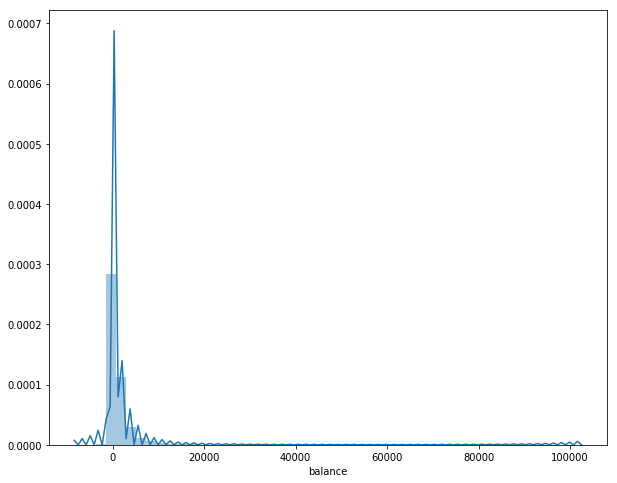

In [27]:
plt.figure(figsize=(10,8))
sns.distplot(bcs_new['balance'])

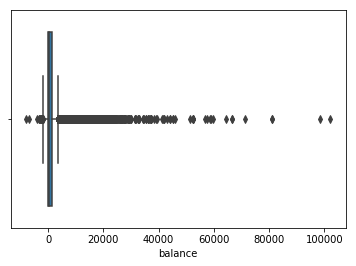

In [28]:
sns.boxplot(bcs_new['balance'])

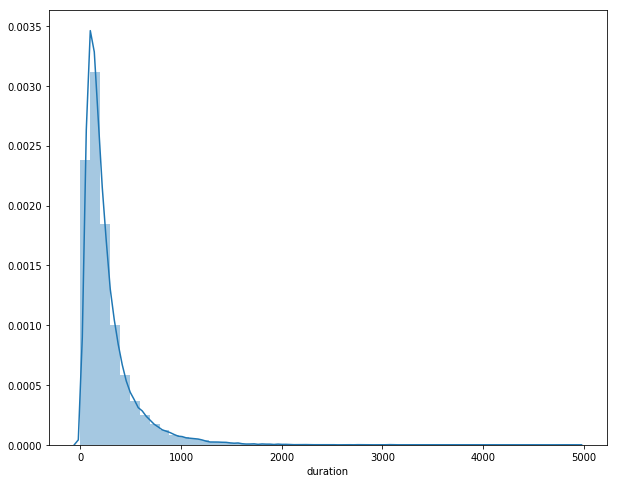

In [29]:
plt.figure(figsize=(10,8))
sns.distplot(bcs_new['duration'])

<Figure size 1080x576 with 0 Axes>

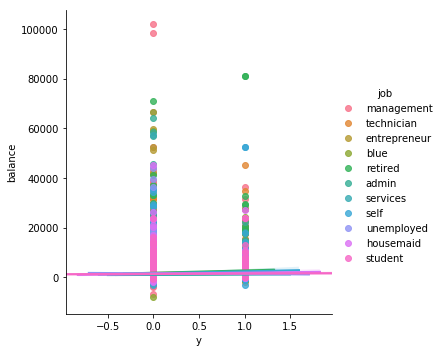

In [30]:
plt.figure(figsize=(15,8))
sns.lmplot(x='y',y='balance',hue='job',data=bcs_new)

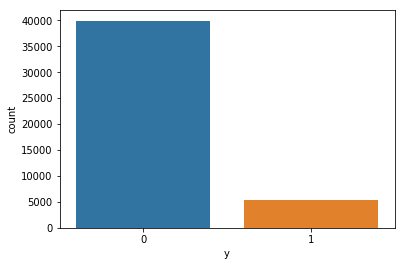

In [31]:
sns.countplot(bcs_new.y)

as our data is imbalanced to around 88 to 12 ratio we will make it balanced we will use oversampling because data is less around 50000 dta points

In [32]:
x=bcs_new.drop(['y','job','marital'],axis=1)
y=bcs_new.y

In [33]:
#from imblearn.combine import SMOTETomek
#from imblearn.under_sampling import NearMiss

In [35]:
from imblearn.over_sampling import RandomOverSampler

In [36]:
os=RandomOverSampler(ratio=1)

In [37]:
x1,y1=os.fit_sample(x,y)

In [38]:
xtrain,xtest,ytrain,ytest=train_test_split(x1,y1,test_size=0.3,random_state=0)

## applying KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)

In [40]:
knn.fit(xtrain,ytrain)
prediction = knn.predict(xtest)

In [41]:
print(prediction)

[1 1 1 ... 1 1 1]


In [42]:
from sklearn import metrics

In [43]:
acc = metrics.accuracy_score(ytest,prediction)
print(acc)

0.9067379143358103


In [44]:
cm=metrics.confusion_matrix(ytest,prediction)
print(cm)

[[ 9707  2082]
 [  152 12013]]


In [45]:
cr=metrics.classification_report(ytest,prediction)
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.82      0.90     11789
           1       0.85      0.99      0.91     12165

   micro avg       0.91      0.91      0.91     23954
   macro avg       0.92      0.91      0.91     23954
weighted avg       0.92      0.91      0.91     23954



In [46]:
knn.score(xtrain,ytrain)

0.9470746108427268

In [47]:
knn.score(xtest,ytest)

0.9067379143358103

In [48]:
neig=np.arange(1,25)
train_accu=[]
test_accu=[]

for i, k in enumerate(neig):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain,ytrain)
    train_accu.append(knn.score(xtrain,ytrain))
    test_accu.append(knn.score(xtest,ytest))

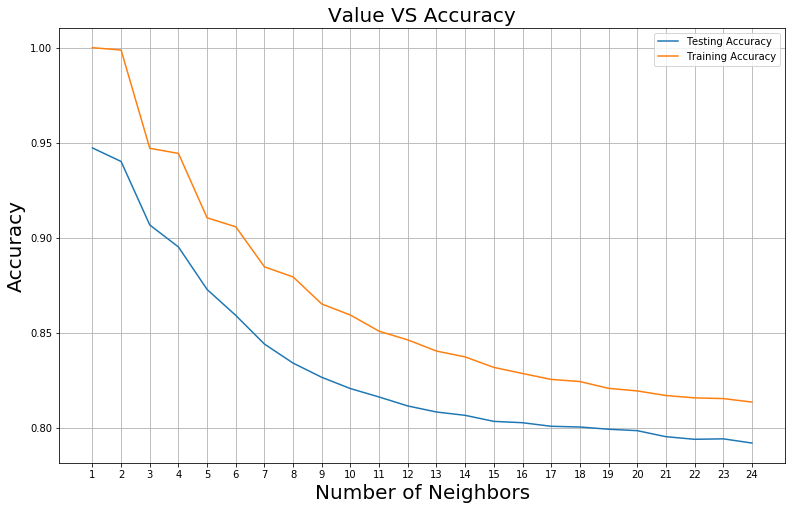

Best accuracy is 0.9472739417216332 with K = 1


In [49]:
# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accu, label = 'Testing Accuracy')
plt.plot(neig, train_accu, label = 'Training Accuracy')
plt.legend()
plt.title('Value VS Accuracy',fontsize=20)
plt.xlabel('Number of Neighbors',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xticks(neig)
plt.grid()
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accu),1+test_accu.index(np.max(test_accu))))

## applying naive bayes

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB


In [51]:
model = GaussianNB()
model.fit(xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [52]:
# make predictions
expected = ytest
predicted = model.predict(xtest)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.75      0.76      0.75     11789
           1       0.76      0.76      0.76     12165

   micro avg       0.76      0.76      0.76     23954
   macro avg       0.76      0.76      0.76     23954
weighted avg       0.76      0.76      0.76     23954

[[8903 2886]
 [2901 9264]]


In [53]:
ypredprob=model.predict_proba(xtest)
ypredprob

array([[0.23418054, 0.76581946],
       [0.29906011, 0.70093989],
       [0.51454269, 0.48545731],
       ...,
       [0.45165011, 0.54834989],
       [0.24345616, 0.75654384],
       [0.4480435 , 0.5519565 ]])

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(expected, predicted, normalize = True)

0.7584119562494782

## applying decision tree 

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
x=bcs_new.drop(['y','job','marital','education'],axis=1)
y=bcs_new.y

In [57]:
y=y.replace({0:'Not Subscribed',1:'Subscribed'})

In [58]:
y=y.astype('category')

In [59]:
x1,y1=os.fit_sample(x,y)

In [60]:
xtrain,xtest,ytrain,ytest=train_test_split(x1,y1,test_size=0.3,random_state=0)

In [61]:
model=DecisionTreeClassifier(criterion = 'entropy')
model.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [62]:
ypred=model.predict(xtest)

In [63]:
acc=metrics.accuracy_score(ytest,ypred)
print(acc)

0.9496535025465476


In [64]:
cm=metrics.confusion_matrix(ytest,ypred)
print(cm)

[[10613  1176]
 [   30 12135]]


In [65]:
cr=metrics.classification_report(ytest,ypred)
print(cr)

                precision    recall  f1-score   support

Not Subscribed       1.00      0.90      0.95     11789
    Subscribed       0.91      1.00      0.95     12165

     micro avg       0.95      0.95      0.95     23954
     macro avg       0.95      0.95      0.95     23954
  weighted avg       0.95      0.95      0.95     23954



In [66]:
print (pd.DataFrame(model.feature_importances_, columns = ["Imp"]))


        Imp
0  0.121600
1  0.001065
2  0.158923
3  0.053553
4  0.015185
5  0.117030
6  0.378998
7  0.045343
8  0.087589
9  0.020716


In [67]:
model2=DecisionTreeClassifier(criterion = 'entropy',max_depth=1)
model2.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [68]:
ypred2=model.predict(xtest)

In [69]:
acc=metrics.accuracy_score(ytest,ypred2)
print(acc)

0.9496535025465476


now we will use decission tree as our algorithm but now lets do feature selection and reduce our dimension

## PCA

In [70]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

In [71]:
x=scaler.fit_transform(x)

C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [72]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)

In [73]:
principalComponents = pca.fit_transform(x)

In [74]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3', 'principal component 4','principal component 5', 'principal component 6'])

In [75]:
principalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6
0,0.126006,0.900037,-1.080708,0.255509,-0.799638,-0.129870
1,0.249769,-0.189317,-1.070468,-0.121129,-1.210917,0.153319
2,0.242975,-1.728616,-1.041435,0.844771,-1.106395,-1.569002
3,0.202720,0.182001,-0.917549,-0.090153,-1.344444,0.095075
4,-0.130843,0.230299,-1.070341,0.163471,-1.015344,0.530976


In [76]:
finalDf = pd.concat([principalDf, y], axis = 1)

In [77]:
pca.explained_variance_ratio_

array([0.15450697, 0.12751937, 0.11517165, 0.10692381, 0.09707838,
       0.09258627])

## pca on train and test set

In [78]:
scaler.fit(xtrain)

C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [79]:
xtrain=scaler.transform(xtrain)
xtest=scaler.transform(xtest)

C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [80]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

In [81]:
pca.fit(xtrain)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [82]:
xtrain=pca.transform(xtrain)
xtest=pca.transform(xtest)

### now applying logistic regression algorithm 

In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow which is why it was changed to 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs')


In [85]:
logisticRegr.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [86]:
pred=logisticRegr.predict(xtest).reshape(1,-1)

In [87]:
logisticRegr.score(xtest,ytest)

0.7855890456708692

In [88]:
print(ytest,pred)

['Subscribed' 'Subscribed' 'Subscribed' ... 'Subscribed' 'Subscribed'
 'Subscribed'] [['Subscribed' 'Subscribed' 'Not Subscribed' ... 'Subscribed'
  'Subscribed' 'Subscribed']]


## decission tree

In [89]:
model=DecisionTreeClassifier(criterion = 'entropy')
model.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [90]:
ypred=model.predict(xtest)

In [91]:
acc=metrics.accuracy_score(ytest,ypred)
print(acc)

0.9453953410703849


In [95]:
model.score(xtrain,ytrain)

1.0

In [92]:
model=DecisionTreeClassifier(criterion = 'gini')
model.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [93]:
ypred=model.predict(xtest)

In [94]:
acc=metrics.accuracy_score(ytest,ypred)
print(acc)

0.944810887534441


## Here our model is not learning more information from data because there is not enough information collected by pca for each feature so its not not good for our dataset.now we will try ensemble techniques for further improvement of our model.

# Ensemble

### Bagging

In [96]:
from sklearn.ensemble import BaggingClassifier
from sklearn import model_selection

In [97]:
x=bcs_new.drop(['y','job','marital'],axis=1)
y=bcs_new.y
x1,y1=os.fit_sample(x,y)
xtrain,xtest,ytrain,ytest=train_test_split(x1,y1,test_size=0.3,random_state=0)

In [98]:
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cart = DecisionTreeClassifier()
num_trees=100

In [99]:
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)

In [100]:
model.fit(xtrain, ytrain)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=100, n_jobs=None, oob_score=False,
         random_state=7, verbose=0, warm_start=False)

In [ ]:
y_pred = model.predict(xtest) 
print("Predicted values:") 
print(y_pred)

In [ ]:
print(metrics.confusion_matrix(ytest, y_pred))

In [ ]:
metrics.accuracy_score(ytest,y_pred)

accuracy is slightly increased 

In [ ]:
#from sklearn.model_selection import learning_curve
#from sklearn.svm import SVC

### Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
max_features = 3
kfold = model_selection.KFold(n_splits=10, random_state=seed)

In [ ]:
model = RandomForestClassifier(n_estimators=num_trees)


In [ ]:
model.fit(xtrain, ytrain)

In [ ]:
y_pred = model.predict(xtest) 
print("Predicted values:") 
print(y_pred)

In [ ]:
print(metrics.confusion_matrix(ytest, y_pred))

In [ ]:
metrics.accuracy_score(ytest,y_pred)

In [ ]:
model.score(xtest,ytest)

In [ ]:
results = model_selection.cross_val_score(model, xtest, ytest, cv=kfold)
print(results.mean())

In [ ]:
x.head()

### Boosting

### AdaBoosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier


In [ ]:
seed = 7
num_trees = 30
kfold = model_selection.KFold(n_splits=10, random_state=seed)


In [ ]:
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)


In [ ]:
model.fit(xtrain,ytrain)

In [ ]:
results = model_selection.cross_val_score(model, xtest, ytest, cv=kfold)

In [ ]:
print(results.mean())

### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
seed = 7
num_trees = 100
kfold = model_selection.KFold(n_splits=10, random_state=seed)

In [ ]:
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)

In [ ]:
model.fit(xtrain,ytrain)

In [ ]:
prediction=model.predict(xtest)
print(accuracy_score(ytest,prediction))

In [ ]:
results = model_selection.cross_val_score(model, xtest, ytest, cv=kfold)
print(results.mean())

### XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [ ]:
model = XGBClassifier()
model.fit(xtrain,ytrain)

In [ ]:
predict_train = model.predict(xtrain)

In [ ]:
accuracy_train = accuracy_score(ytrain,predict_train)

In [ ]:
predict_test = model.predict(xtest)
accuracy_test = accuracy_score(ytest,predict_test)

In [ ]:
print(accuracy_train)

In [ ]:
print(accuracy_test)